# S-D map remake

In [1]:
using Plots
using JLD2
using LaTeXStrings

In [2]:
# define x, y range
rK = exp.(range(-4., stop = 4., length = 100))
KS = exp.(range(-4., stop = 4., length = 100));

## Load data

In [35]:
df_name = "SD_new_n4_100_edited.jld2"
behaviors = load("data/" * df_name, "behaviors")
first(behaviors, 5)

5-element Vector{Symbol}:
 :stochastic_pulsing
 :stochastic_pulsing
 :stochastic_pulsing
 :stochastic_pulsing
 :stochastic_pulsing

In [23]:
# # remove the irregular oscillation "outliers"
# for i = 1:30
#     for j = 1:100
#         if behaviors[i, j] == :irregular_oscillation
#             behaviors[i, j] = :stochastic_pulsing
#         end
#     end
# end
# save("data/SD_new_n4_100_edited.jld2", Dict("behaviors" => behaviors))

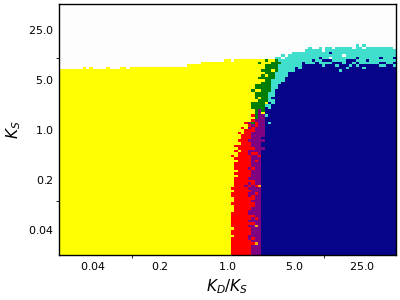

In [36]:
pyplot()
num_behaviors = zeros(Int64, size(behaviors)...)

sym2num = Dict(:oscillation => 1, :stochastic_pulsing => 2, :no_expression => 3,
    :stochastic_anti_pulsing => 4, :het_activation => 5, :stochastic_switching => 6,
    :homo_activation => 7, :irregular_oscillation => 8, :undefined => 9)
color_grad = cgrad([:red, :yellow, :white, :purple, 
        :turquoise, :green, :darkblue, :orange, :black], categorical = true)

for i = 1:size(behaviors, 1)
    for j = 1:size(behaviors, 2)
        num_behaviors[i, j] = sym2num[behaviors[i, j]]
    end
end

# switch to pyplot due to a bug in gr() color bar
pyplot()
# assign the min/max since undefined is hardly encountered
# color bar is messed up. not shown
heatmap(rK, KS, num_behaviors', c = color_grad, framestyle = :box,
    xaxis = :log, yaxis = :log,
    xticks = (5. .^(-2:2), 5. .^(-2:2)),
    yticks = (5. .^(-2:2), 5. .^(-2:2)),
    xlabel = L"K_D/K_S", ylabel = L"K_S", clim = (1, 9), legend = :none)
plot!(size = (400, 300))

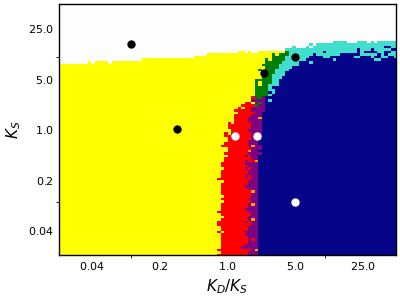

In [64]:
selected_coords = [
    (15., 0.1),    # no expression
    (1., 0.3),    # stochastic pulsing
    (0.8, 1.2),    # oscillation
    (0.8, 2.),    # stochastic anti-pulsing
    (6., 2.4),    # stochastic switching
    (10., 5.),    # het activation
    (0.1, 5.)    # homo activation
]
colors = [:black, :black, :white, :white, :black, :black, :white]

scatter!([ selected_coords[i][2] for i = 1:length(selected_coords) ],
    [ selected_coords[i][1] for i = 1:length(selected_coords) ],
    markersize = 6, color = colors, markerstrokewidth = 0)
xlims!(exp(-4), exp(4))
ylims!(exp(-4), exp(4))

## Save figure

In [37]:
savefig("SD_new_n4_100.pdf")